In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Bugungi tahlil mavzusi nomi: Dataset salary 2024.csv

## Dataframega data ni chaqirib olamiz

In [3]:
salary = pd.read_csv("Dataset salary 2024.csv")
salary.sort_values(by = "work_year").head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
16529,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16532,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
16531,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16467,2020,EN,FT,Data Engineer,4450000,JPY,41689,JP,100,JP,S
16468,2020,SE,FT,Big Data Engineer,100000,EUR,114047,PL,100,GB,S


Qulay bo'lishi uchun head funksiyasini ham berdik

In [4]:
salary.shape

(16534, 11)

Ko'rib turganimizday 11 ta ustunda 16534 qator ma'lumot bizda mavjud.

### Ushbu dataframe haqida ma'lumot beramiz

#### Nima haqida?

Ma'lumotlarni ishlab chiquvchilarning ish haqi va bandlik atributlari bo'yicha 2024 yilgi ma'lumotlar to'plami ma'lumotlarni ishlab chiquvchilarning rivojlanayotgan landshafti haqida qimmatli tushunchalarni taqdim etadi. U ish haqi, lavozim nomi, tajriba darajasi, bandlik turi, xodimning yashash joyi, masofaviy ish nisbati, kompaniyaning joylashuvi va kompaniya hajmi kabi asosiy o'zgaruvchilarni o'z ichiga oladi. Ushbu ma'lumotlar ish haqi tendentsiyalari, bandlik shakllari va ma'lumotlarni ishlab chiquvchi rollaridagi geografik o'zgarishlarni batafsil tahlil qilish imkonini beradi. Tadqiqotchilar, tahlilchilar va tashkilotlar kompensatsiya tendentsiyalarini, ma'lumotlarni ishlab chiquvchi rollarining turli mintaqalar bo'ylab taqsimlanishini va masofaviy ish va kompaniya hajmining ushbu sohadagi bandlikka ta'sirini yaxshiroq tushunish uchun ushbu ma'lumotlar to'plamidan foydalanishlari mumkin.

#### Ustunlarning tavsifi:

Feature Description:
experience_level = tajriba darajasi: Kasbiy tajriba darajasi (masalan, kichik, o'rta, katta).

employment_type = ish turi: Mehnat shartnomasi turi (masalan, to'liq kunlik, yarim kunlik, shartnoma).

job_title = lavozimi: Xodimning o'ziga xos roli yoki unvoni (masalan, ma'lumotlar muhandisi - Data Engineer).

salary = maosh: Ish haqi aslida olingan valyutada .

salary_currency = maosh valyutasi: Ish haqi to'lanadigan valyuta.

salary_in_usd = maosh AQSh dollarida: Taqqoslash uchun ish haqi AQSh dollariga aylantirildi.

employee_residence = xodimning yashash joyi: Xodimning yashash joyi.

remote_ratio = masofaviy nisbatda: Masofadan bajarilgan ishlarning foizi.

company_location = kompaniya joylashuvi: Kompaniyaning geografik joylashuvi.

company_size = kompaniya hajmi: kompaniyaning ko'lami, ko'pincha xodimlar soniga asoslanadi.

## Matplotlib  bilan ishlash

### pyplot interface ni ochamiz

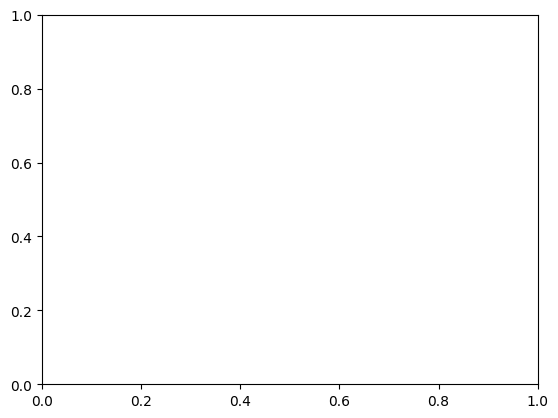

In [5]:
fig, ax = plt.subplots()
plt.show()

Ko'rib turganingizdek bu interfeys bo'sh, sababi unga biz xali ma'lumot bermadik

### Doimo ishlatadigan data larimizni qisqartirib saqlab olamiz

In [6]:
year = salary["work_year"]
usd_sal = salary.groupby(["work_year", "job_title"])["salary_in_usd"]
JMS = salary["experience_level"] # J - Junior, M - Mid, S - Senior
job_time = salary["employment_type"]
job_tit = salary["job_title"]
sal = salary["salary"]
emp_location = salary["employee_residence"]
remotely = salary["remote_ratio"]
comp_location = salary["company_location"]

### Plot (chiziqli grafik) bilan ishlasj

#### axes ya'ni o'qlarimizga data (ma'lumot) larni qo'shamiz

#### maksimal qatorlarni chiqarish orqali biz data yo'nalishidagi kasblarning nechtasida ma'lumot borligini ko'ramiz. 

In [7]:
pd.set_option('display.max_rows', None)
job_tit.value_counts()

job_title
Data Engineer                               3464
Data Scientist                              3314
Data Analyst                                2440
Machine Learning Engineer                   1705
Research Scientist                           531
Applied Scientist                            435
Data Architect                               435
Analytics Engineer                           431
Research Engineer                            306
Data Science                                 271
Business Intelligence Engineer               248
Data Manager                                 212
ML Engineer                                  200
Business Intelligence Analyst                191
Machine Learning Scientist                   138
Research Analyst                             123
Data Science Manager                         122
AI Engineer                                  120
Business Intelligence                         98
BI Developer                                  90
Data Speci

In [8]:
job_tit.value_counts().shape

(155,)

Ko'rib turganimizdek bizda 155 hil kasblarda ma'lumot bor. Biz yuqoridagi 4 tasini olamiz.

#### Chizma

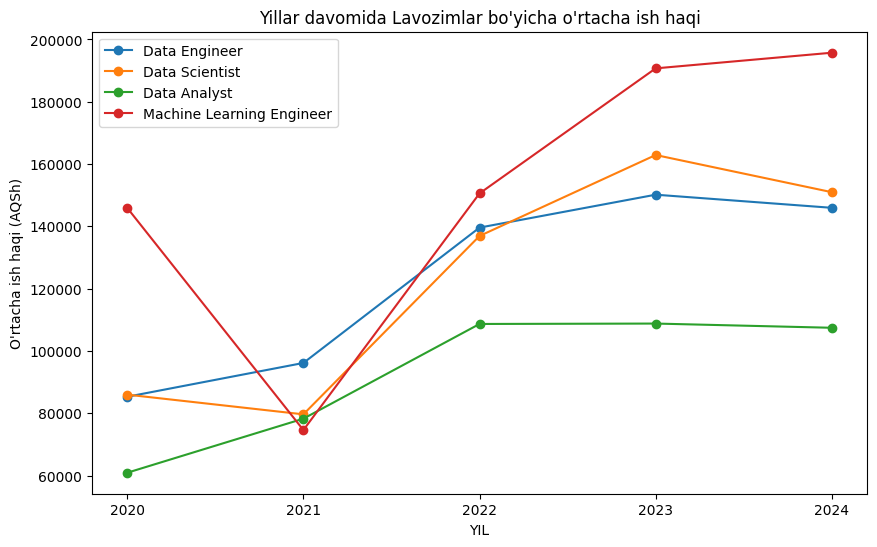

In [9]:
grouped = salary.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().reset_index()
job_title_counts = salary['job_title'].value_counts().sort_values(ascending=False)
sorted_job_titles = job_title_counts.index

fig, ax = plt.subplots(figsize=(10, 6))
for job_title in sorted_job_titles[:4]:
    filtered = grouped[grouped['job_title'] == job_title]
    x = filtered['work_year']
    y = filtered['salary_in_usd']
    ax.plot(x, y, marker='o', label=job_title)

ax.set_xlabel("YIL")
ax.set_ylabel("O'rtacha ish haqi (AQSh)")
ax.set_title("Yillar davomida Lavozimlar bo'yicha o'rtacha ish haqi")
ax.legend()
plt.xticks(np.arange(min(salary['work_year']), max(salary['work_year']) + 1, 1))

plt.show()



plt.xticks(np.arange(min(salary['work_year']), max(salary['work_year']) + 1, 1)) - bu ko'dimiz "X" o'qida 2020 dan 2024, ya'ni min dan max gacha "+1" qadam yurib raqamlarni qo'yib beradi.

Ko'rib turganimizek 4 ta yo'nalish bo'yicha analiz qildik. Bu kasblarda ma'lumotlarimiz eng ko'p. Ushbu izohda men ushbu kasblar qancha oylik olishini aytmayman, sababi chizmada yaqqol ko'rinib turibti.

Machine Learning Engineer kasbi maoshi hozirda eng yuqi=ori o'rinlarda turibti desak ham bo'ladi

Qolgan kasblarning ham maoshi yillar davomida oshib bormoqda.

Data Scientistni maoshi 2024 yilda tushgan bo'lsada, umid qilamizki 2025 yilda oshadi.

E'tibor bergan bo'lsangiz 2020 dan 2021 yilga o'tar yili ushbu chizmadagi 2 ta kasbimizning va boshqa kasblarning ham  maoshlari kamaygan, bunga sabab deb 2019 yil oxiri 2020 yil boshida tarqalgan COVID-19 epidemiyasi desak xato bo'lmaydi.

Yuqoridagi kodning "for job_title in sorted_job_titles[:4]:" qatorida "[:4]" qismini o'zgartirib boshqa kasblarni ham ko'rishimiz mumkin.

#### Errorbar

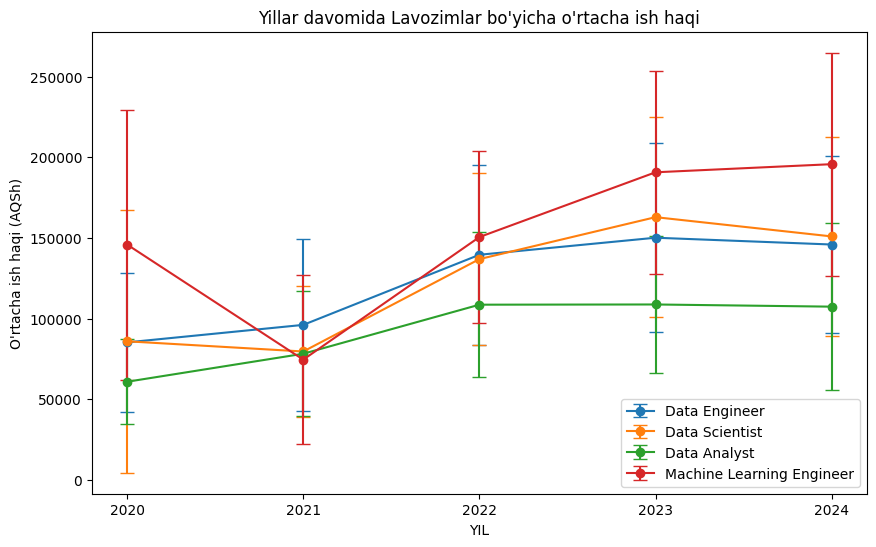

In [10]:
grouped = salary.groupby(['work_year', 'job_title'])['salary_in_usd'].agg(['mean', 'std']).reset_index()
job_title_counts = salary['job_title'].value_counts().sort_values(ascending=False)
sorted_job_titles = job_title_counts.index

fig, ax = plt.subplots(figsize=(10, 6))
for job_title in sorted_job_titles[:4]:
    filtered = grouped[grouped['job_title'] == job_title]
    x = filtered['work_year']
    y = filtered['mean']
    yerr = filtered['std']
    ax.errorbar(x, y, yerr=yerr, marker='o', label=job_title, capsize=5)

ax.set_xlabel("YIL")
ax.set_ylabel("O'rtacha ish haqi (AQSh)")
ax.set_title("Yillar davomida Lavozimlar bo'yicha o'rtacha ish haqi")
ax.legend()
plt.xticks(np.arange(min(salary['work_year']), max(salary['work_year']) + 1, 1))

plt.show()